In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [7]:
df = df.drop("enrollee_id", axis=1)

In [8]:
df['gender'] = df['gender'].fillna('Unknown')
df['enrolled_university'] = df['enrolled_university'].fillna('Unknown')
df['education_level'] = df['education_level'].fillna('Unknown')
df['major_discipline'] = df['major_discipline'].fillna('Unknown')
df['experience'] = df['experience'].fillna('Unknown')
df['company_size'] = df['company_size'].fillna('Unknown')
df['company_type'] = df['company_type'].fillna('Unknown')
df['last_new_job'] = df['last_new_job'].fillna('Unknown')

In [9]:
label_cols = [
    'gender','relevent_experience','enrolled_university',
    'education_level','major_discipline','experience',
    'company_size','company_type','last_new_job','city'
]

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [10]:
scaler = StandardScaler()
df[['city_development_index', 'training_hours']] = scaler.fit_transform(
    df[['city_development_index', 'training_hours']]
)

In [11]:
X = df.drop("target", axis=1)
y = df["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (15326, 12)
Testing shape: (3832, 12)


In [ ]:
# Save full preprocessed dataset
df.to_csv("preprocessed_full.csv", index=False)
print("✅ Preprocessed full dataset saved as preprocessed_full.csv")

# Save training set
train_data = X_train.copy()
train_data["target"] = y_train
train_data.to_csv("train_preprocessed.csv", index=False)
print("✅ Training set saved as train_preprocessed.csv")

# Save test set
test_data = X_test.copy()
test_data["target"] = y_test
test_data.to_csv("test_preprocessed.csv", index=False)
print("✅ Test set saved as test_preprocessed.csv")

In [13]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

print("SVM model trained successfully!")

SVM model trained successfully!


In [14]:
y_pred = svm_model.predict(X_test)

In [15]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.7515657620041754

Confusion Matrix:
[[2880    0]
 [ 952    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2880
           1       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# SVM models do not have a feature_importances_ attribute in the same way as tree-based models.
# Therefore, we cannot plot feature importance directly from the SVM model.
# If you want to understand feature importance for SVM, you might need to use other methods
# like permutation importance or analyzing the weights of the features in the linear SVM kernel (if applicable).

# The following code is commented out as it caused an error:
# feature_importances = pd.Series(svm_model.feature_importances_, index=X_train.columns)
# feature_importances.nlargest(10).plot(kind='barh', figsize=(8,6), color="teal")
# plt.title("Top 10 Important Features")
# plt.show()

print("SVM models do not have a direct feature_importances_ attribute for plotting.")
print("Consider using other methods like permutation importance to evaluate feature importance for SVM.")

SVM models do not have a direct feature_importances_ attribute for plotting.
Consider using other methods like permutation importance to evaluate feature importance for SVM.


/tmp/ipython-input-742801009.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


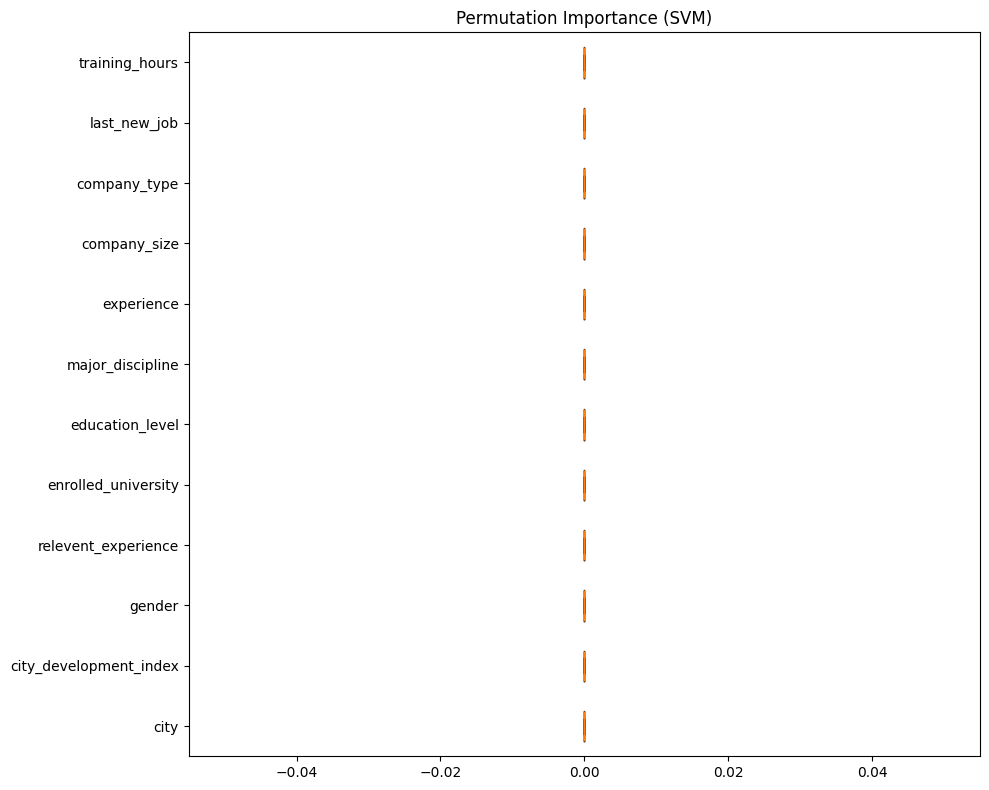

In [19]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Sort the features by importance
sorted_idx = result.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_test.columns[sorted_idx],
)
plt.title("Permutation Importance (SVM)")
plt.tight_layout()
plt.show()